In [1]:
import cv2
from matplotlib import pyplot as plt
from edge_detection import*
import os

In [2]:
test_path = r"BSDS500\data/images/test"
train_path = r"BSDS500\data\images\train"
validation_path = r"BSDS500\data\images\val"
ground_truth_test_path = r"BSDS500\data/images/ground_truth_test"

In [3]:
ground_truth_images_path = read_images(ground_truth_test_path)
ground_truth_test_images = []
for path in ground_truth_images_path:
    ground_truth_test_images.append(read_ground_truth_images(f"{ground_truth_test_path}/{path}"))

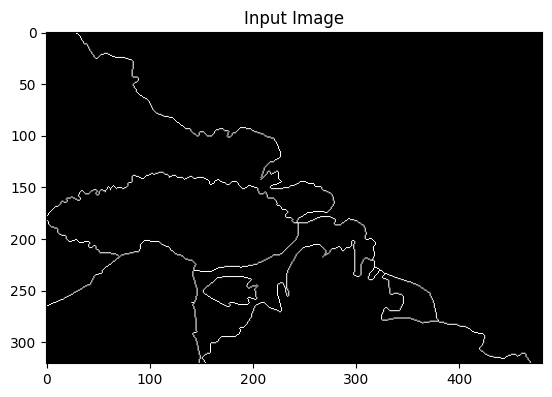

In [4]:
show_image(ground_truth_test_images[4])

In [5]:
cv_images = read_images_from_path(test_path)
sobel_cv_images3 = []
sobel_cv_images5 = []
sobel_cv_images7 = []
for cv_image in cv_images:
    sobel_image = perform_edge_detection(cv_image, ksize=3, threshold=255)
    sobel_cv_images3.append(sobel_image)
    sobel_image = perform_edge_detection(cv_image, ksize=5, threshold=255*16)
    sobel_cv_images5.append(sobel_image)
    sobel_image = perform_edge_detection(cv_image, ksize=7, threshold=100*255)
    sobel_cv_images7.append(sobel_image)


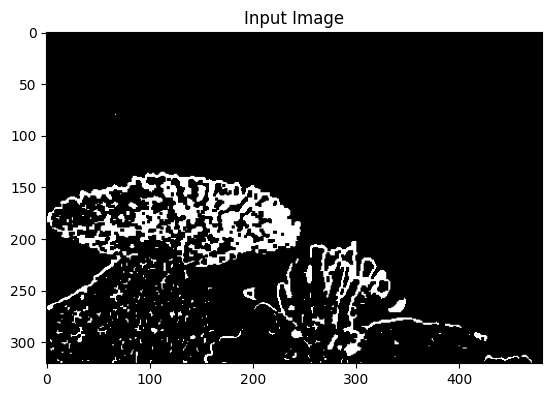

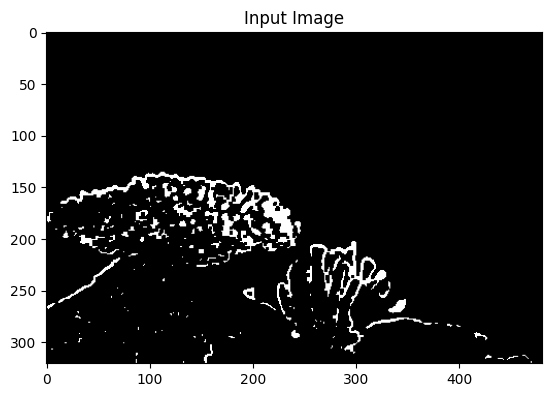

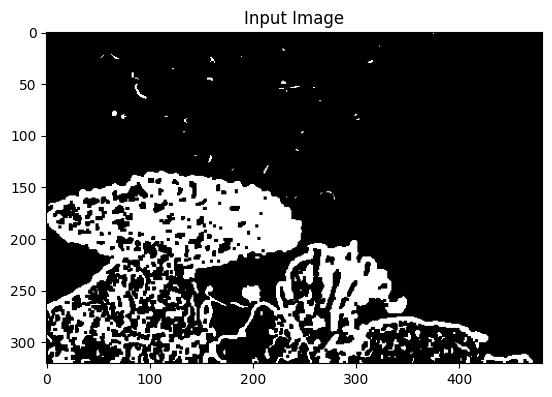

In [6]:
show_image(sobel_cv_images3[4])
show_image(sobel_cv_images5[4])
show_image(sobel_cv_images7[4])

In [7]:
import skimage.metrics
# Calculate evaluation metrics
mse3 = ((ground_truth_test_images[4] - sobel_cv_images3[4]) ** 2).mean()
mse5 = ((ground_truth_test_images[4] - sobel_cv_images5[4]) ** 2).mean()
mse7 = ((ground_truth_test_images[4] - sobel_cv_images7[4]) ** 2).mean()
print("MSE:", mse3, mse5,mse7)

MSE: 4764.251559251559 2608.707909922863 11175.314667651117


In [8]:
def calculate_mse(image1, image2):
    """Calculate the Mean Squared Error (MSE) between two images."""
    if len(image1.shape) == 3 and image1.shape[-1] == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    if len(image2.shape) == 3 and image2.shape[-1] == 3:
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    mse = np.mean((image1 - image2)**2)
    return mse


In [9]:
calculate_mse(ground_truth_test_images[4], sobel_cv_images3[4])

4764.251559251559

In [10]:
import cv2
import numpy as np

def evaluate_image(image, ground_truth, threshold):
  """Evaluates an image against a ground truth.

  Args:
    image: The image to evaluate.
    ground_truth: The ground truth for the image.
    threshold: The threshold value used for edge detection.

  Returns:
    A tuple of (accuracy, precision, recall, f1_score, threshold).
  """

  ground_truth_np = np.uint8(ground_truth)

  # Get the predictions from the thresholded image.
  _, predictions = cv2.connectedComponents(image)

  # Calculate the accuracy, precision, and recall.
  accuracy = np.sum(predictions == ground_truth_np) / predictions.size
  precision = np.sum(predictions == ground_truth_np) / np.sum(predictions)
  recall = np.sum(predictions == ground_truth_np) / np.sum(ground_truth_np)

  # Calculate the F1 score.
  f1_score = (2 * precision * recall) / (precision + recall)

  return accuracy, precision, recall, f1_score


In [11]:
x = evaluate_image(ground_truth_test_images[4], sobel_cv_images3[4],100)
x

(0.9174422445450483,
 62.84560780834073,
 0.04908162947101442,
 0.09808665449821767)

In [12]:
y_true, y_pred=ground_truth_test_images[4],sobel_cv_images3[4]
img_true, img_pred=ground_truth_test_images[4],sobel_cv_images3[4]

In [13]:
from skimage.metrics import structural_similarity as ssim

# Load the ground truth and predicted images
ground_truth_image = img_true
predicted_image = img_pred

# Calculate the SSIM score between the two images
score = ssim(ground_truth_image, predicted_image, multichannel=True, data_range=predicted_image.max() - predicted_image.min())

# Print the SSIM score
print(f"SSIM: {score}")


SSIM: 0.7514848049489157


In [48]:
from itertools import product
def optimize_parameters_ssim(img_true, img_pred):
    # Define the range of values to test for ksize and threshold
    ksize_range = [3, 5, 7]
    threshold_range = [0,10,20,30,25,50,75, 100,125, 150,175,200,225,255]

    # Generate all combinations of ksize and threshold values
    param_combinations = product(ksize_range, threshold_range)

    # Evaluate the edge detection algorithm with each parameter combination
    results = {}
    for ksize, threshold in param_combinations:
        edges = perform_edge_detection(img_pred, ksize=ksize, threshold=threshold)
        mse = ssim(img_true, edges, multichannel=True, data_range=predicted_image.max() - predicted_image.min())
        results[(ksize, threshold)] = mse

    # Select the best parameter combination based on the evaluation score
    best_params = max(results, key=results.get)
    return best_params


In [49]:
from itertools import product
def optimize_parameters_mse(img_true, img_pred):
    # Define the range of values to test for ksize and threshold
    ksize_range = [3, 5, 7]
    threshold_range = [0,10,20,30,25,50,75, 100,125, 150,175,200,225,255]

    # Generate all combinations of ksize and threshold values
    param_combinations = product(ksize_range, threshold_range)

    # Evaluate the edge detection algorithm with each parameter combination
    results = {}
    for ksize, threshold in param_combinations:
        edges = perform_edge_detection(img_pred, ksize=ksize, threshold=threshold)
        mse = calculate_mse(img_true, edges)
        results[(ksize, threshold)] = mse

    # Select the best parameter combination based on the evaluation score
    best_params = min(results, key=results.get)
    return best_params

In [51]:
optimize_parameters_mse(img_true, img_pred)

(3, 255)

In [52]:
frames_list, filtered_frames_list = create_frames_from_video('flick.mp4' , sobel_threshold_value =255, ksize =3)

In [53]:
show_video_from_frames(frames_list, filtered_frames_list)